# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__L'ensemble de données comprend 6 variables sur 440 clients. Les valeurs sont quantitatives et sont les suivantes:__

- Fresh: dépenses annuelles en produits frais
- Milk: dépenses annuelles en produits laitiers
- Grocery: dépenses annuelles en produits d'épicerie
- Frozen: dépenses annuelles en produits surgelés
- Detergents_paper: dépenses annuelles en détergents et produits en papier
- Delicassen: dépenses annuelles en produits d'épicerie fine

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [56]:
# Import des données
data = pd.read_excel('MT15_exam_acp_classification.xls')
data.head()

Unnamed: 0  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   Client 1  12669  9656     7561     214              2674        1338
1   Client 2   7057  9810     9568    1762              3293        1776
2   Client 3   6353  8808     7684    2405              3516        7844
3   Client 4  13265  1196     4221    6404               507        1788
4   Client 5  22615  5410     7198    3915              1777        5185

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Afficher le graphique des individus et analyser.
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des clients qui composent chacune des classes.   

In [57]:
# Sélection des variables quantitatives et conversion en forme verticale
x = data.iloc[:,1:7].values
x

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [58]:
import sklearn

In [59]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [60]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [61]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x)

#nombre de composantes calculées
n = acp.n_components_

In [62]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)

[2.64497357 1.70258397 0.74006477 0.56373023 0.28567634 0.06297111]


In [63]:
#ratio de réprésentation des valeurs prores
print([ratio for ratio in acp.explained_variance_ratio_])

[0.44082892881128055, 0.2837639952661693, 0.12334412896786455, 0.09395503752971497, 0.04761272400688682, 0.010495185418083766]


In [64]:
#Si on conserve les 2 premieres valeurs propres: on conserver 44+28 =72% de l'information

In [65]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

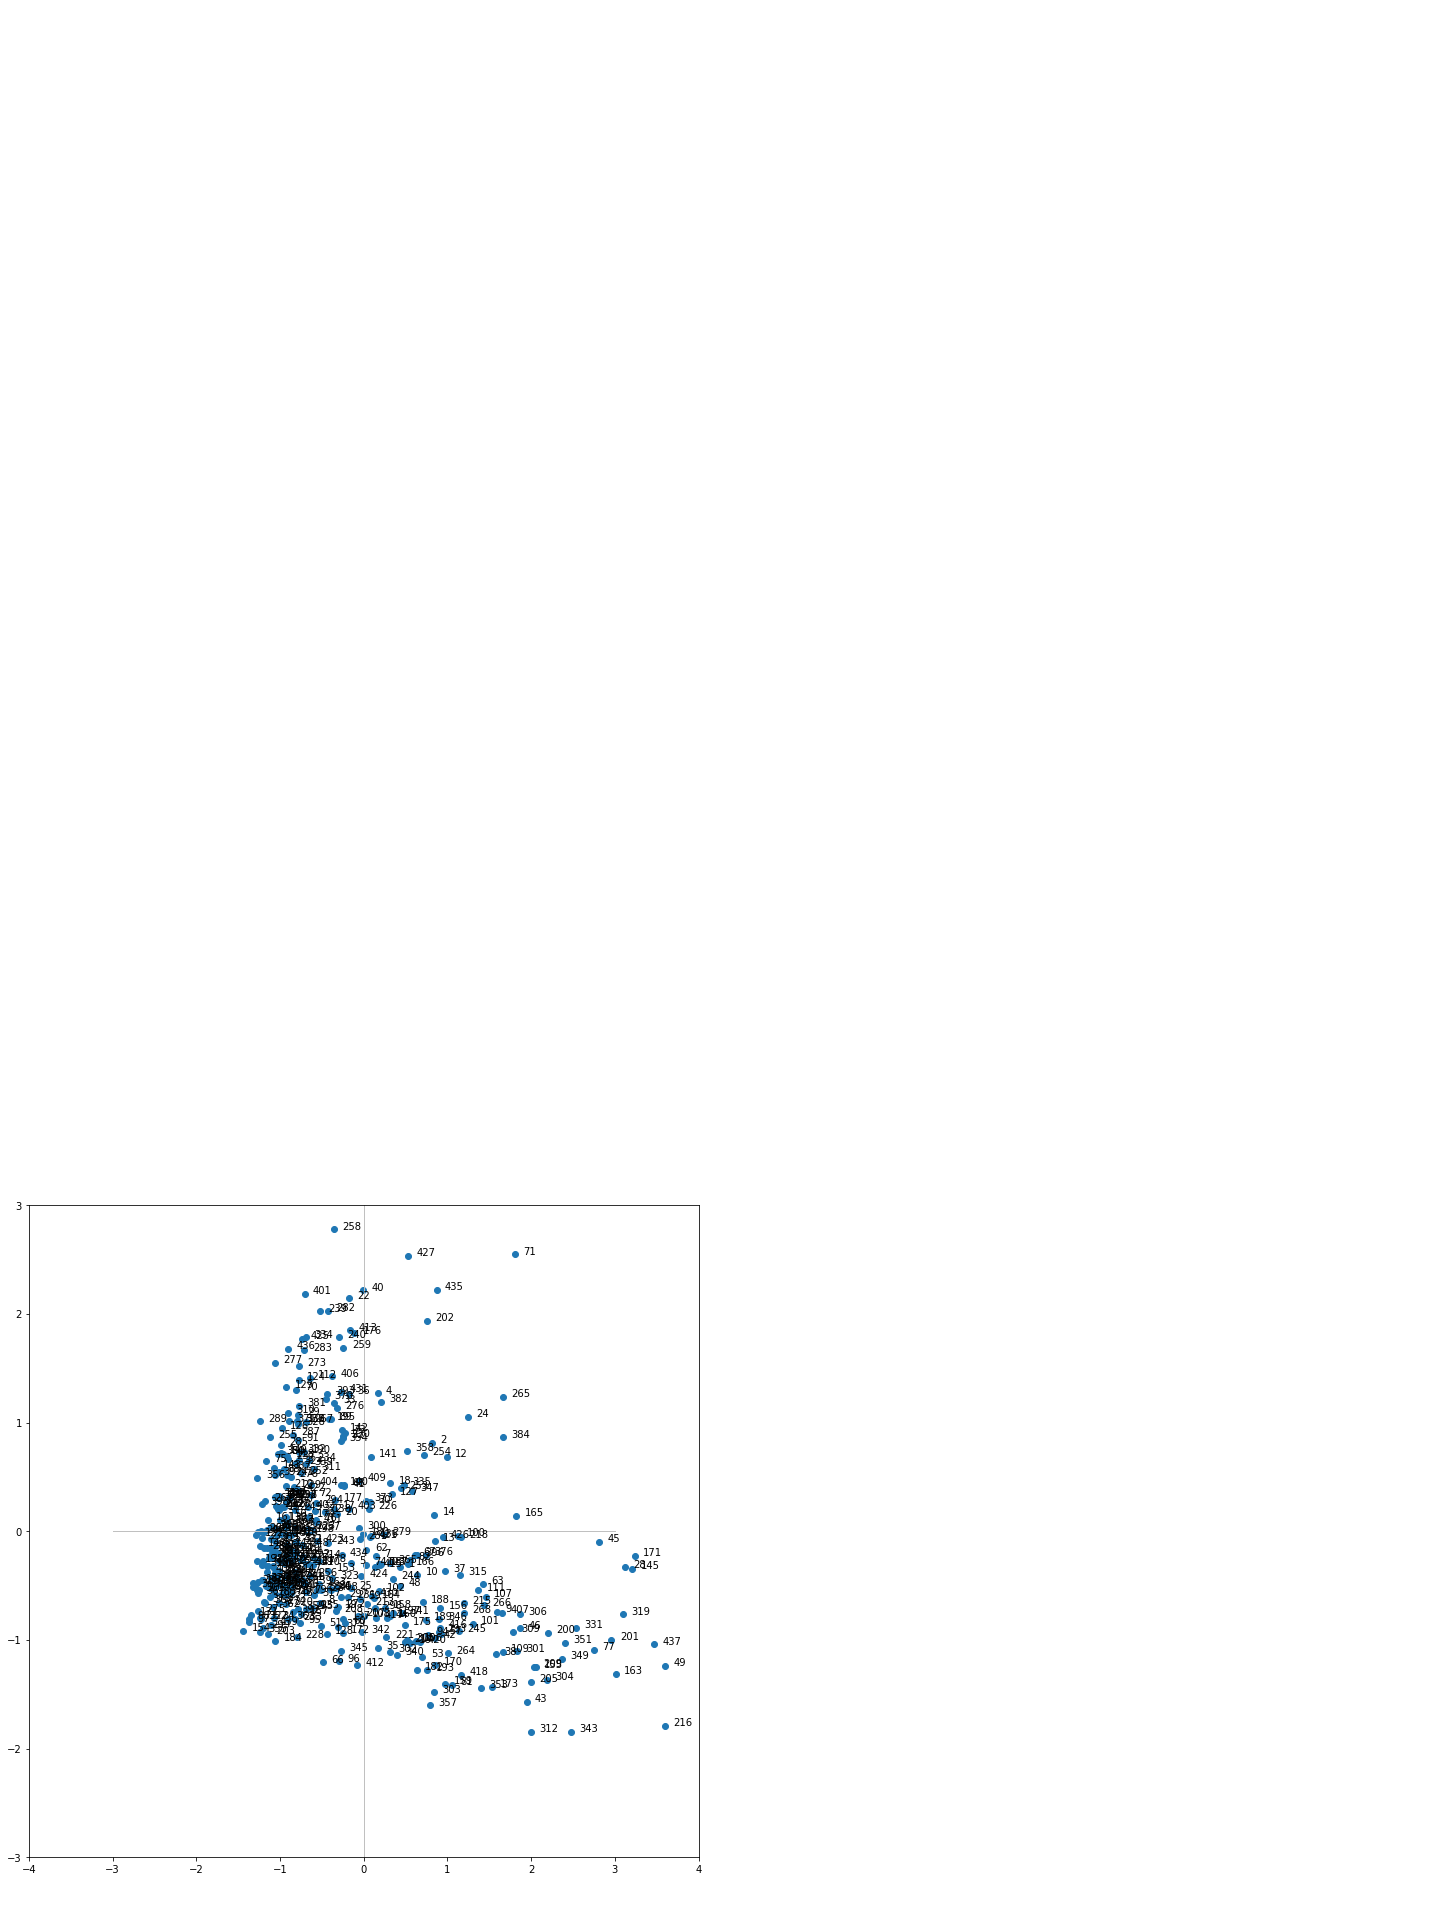

In [66]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(440):
     plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-3,3],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [67]:
bs = 1/np.arange(6,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
print(bs)
print(eigval)

[2.45       1.45       0.95       0.61666667 0.36666667 0.16666667]
[2.64497357 1.70258397 0.74006477 0.56373023 0.28567634 0.06297111]


In [68]:
# pour la methode des batons brises on conserve 2 variables.
# de meme pour la methode de kaisser on prend seulement les valeurs propre >1 --> 2 composantes principales a conserve

In [69]:
#contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

      ID        d_i
0      0   0.632268
1      1   0.566947
2      2   5.436559
3      3   1.283337
4      4   2.487360
..   ...        ...
435  435   8.093296
436  436   6.084971
437  437  13.899635
438  438   1.195152
439  439   2.082350

[440 rows x 2 columns]


In [70]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(6):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.059091  0.147225
1      1  0.332872  0.190238
2      2  0.121024  0.122206
3      3  0.472434  0.332015
4      4  0.011117  0.649903
..   ...       ...       ...
435  435  0.093651  0.609412
436  436  0.133861  0.462130
437  437  0.864131  0.077791
438  438  0.705153  0.000755
439  439  0.586514  0.356281

[440 rows x 3 columns]


In [82]:
#contributions des individus aux axes
ctr = coord**2
for j in range(6):
     ctr[:,j] = ctr[:,j]/(440*eigval[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.000032  0.000124
1      1  0.000162  0.000144
2      2  0.000565  0.000887
3      3  0.000521  0.000569
4      4  0.000024  0.002158
..   ...       ...       ...
435  435  0.000651  0.006584
436  436  0.000700  0.003754
437  437  0.010321  0.001443
438  438  0.000724  0.000001
439  439  0.001049  0.000990

[440 rows x 3 columns]


In [72]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


In [73]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

In [74]:
#corrélation des variables avec les axes
corvar = np.zeros((6,6))
for k in range(6):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.06974378  0.68886221 -0.6987601  -0.1777082  -0.02602031 -0.00904023]
 [ 0.88654635  0.10851973  0.05194998 -0.0654639   0.44179588 -0.00954582]
 [ 0.94206631 -0.19062039 -0.09323953  0.07957747 -0.1683631   0.18111491]
 [ 0.08324992  0.79761402  0.15346028  0.57714209 -0.01492942 -0.00392399]
 [ 0.89227411 -0.33303614 -0.11716213  0.12894882 -0.18153322 -0.17211849]
 [ 0.40444082  0.65790499  0.45069909 -0.41450107 -0.16820333 -0.01885419]]


In [80]:
#on affiche pour les deux premiers axes
newdata=data[["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]]
print(pd.DataFrame({'id':newdata.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                 id     COR_1     COR_2
0             Fresh  0.069744  0.688862
1              Milk  0.886546  0.108520
2           Grocery  0.942066 -0.190620
3            Frozen  0.083250  0.797614
4  Detergents_Paper  0.892274 -0.333036
5        Delicassen  0.404441  0.657905


In [81]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(6):
     plt.annotate(newdata.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [84]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':newdata.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


                 id    COS2_1    COS2_2
0             Fresh  0.004864  0.474531
1              Milk  0.785964  0.011777
2           Grocery  0.887489  0.036336
3            Frozen  0.006931  0.636188
4  Detergents_Paper  0.796153  0.110913
5        Delicassen  0.163572  0.432839


In [ ]:
# analyse du cercle de correlation:
# on remarque que les frozen et fresh sont correles avec l'axe 2 et que les variables milk grocery et detergents papers sont correles avec l'axe 1.
#les deux groupes de variables sont independats (angle de 90 entre eux). ce qui est tres logique.
#la depense annuelle des produits fresh et frozen augmente avec l'axe 2
# la depense annuelle des autres produits augmente avec l'axe 1

#analyse du plan factorielle:
#la pluspard des individus se trouvent dans la partie negative de l'axe 1, ce qui montre que la depenses annuelles en milk, grocery et detergent papers est inferieur a la moyenne et elle est proche de moyenne pour les produits fresh
